In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import fix_yahoo_finance as yf

C:\Users\ANNES\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\ANNES\Anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and no longer available.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


In [2]:
import seaborn as sns

C:\Users\ANNES\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
#Use pandas_datareader to obtain the historical stock information
import pandas_datareader
import datetime

In [4]:
import pandas_datareader.data as web


In [5]:
# Start and End Dates for the Data
start = datetime.datetime(2012,1,1)
end = datetime.date.today()
#end = pd.to_datetime('today')
#end = datetime.datetime(2017,1,1)

In [6]:
datetime.MAXYEAR

9999

In [7]:
SPY_OLD = web.DataReader('SPY','google',start,end)
SPY = web.get_data_yahoo("SPY",start,end)
GLD_OLD = web.DataReader('GLD','google',start,end)
GLD = web.get_data_yahoo("GILD",start,end)
DIA_OLD = web.DataReader('DIA','google',start,end)
DIA = web.get_data_yahoo("DIA",start,end)

C:\Users\ANNES\Anaconda3\lib\site-packages\pandas_datareader\data.py:137: ResourceWarning: unclosed <socket.socket fd=1388, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.197', 57251), raddr=('172.217.0.132', 80)>
  session=session).read()
C:\Users\ANNES\Anaconda3\lib\site-packages\pandas_datareader\data.py:137: ResourceWarning: unclosed <socket.socket fd=1632, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.197', 57252), raddr=('172.217.8.174', 80)>
  session=session).read()
C:\Users\ANNES\Anaconda3\lib\site-packages\pandas_datareader\data.py:137: ResourceWarning: unclosed <socket.socket fd=2276, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.197', 57255), raddr=('172.217.0.132', 80)>
  session=session).read()
C:\Users\ANNES\Anaconda3\lib\site-packages\pandas_datareader\data.py:137: ResourceWarning: unclosed <socket.socket fd=2284, family=AddressFamily.AF_INET, type=Sock

In [8]:
SPY.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2017-09-01', '2017-09-05', '2017-09-06', '2017-09-07',
               '2017-09-08', '2017-09-11', '2017-09-12', '2017-09-13',
               '2017-09-14', '2017-09-15'],
              dtype='datetime64[ns]', name='Date', length=1436, freq=None)

In [9]:
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,113.410439,193697900
2012-01-04,127.199997,127.809998,126.709999,127.699997,113.588333,127186500
2012-01-05,127.010002,128.229996,126.430000,128.039993,113.890732,173895000
2012-01-06,128.199997,128.220001,127.290001,127.709999,113.597221,148050000
2012-01-09,128.000000,128.179993,127.410004,128.020004,113.872963,99530200


In [10]:
SPY.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Open,1436.0,1.893346e+02,3.249380e+01,1.270100e+02,1.637900e+02,1.965900e+02,2.104225e+02,2.498000e+02
High,1436.0,1.901292e+02,3.251752e+01,1.278100e+02,1.645225e+02,1.976200e+02,2.111025e+02,2.503200e+02
Low,1436.0,1.884694e+02,3.245126e+01,1.264300e+02,1.628875e+02,1.956400e+02,2.094225e+02,2.496000e+02
Close,1436.0,1.893799e+02,3.248662e+01,1.275000e+02,1.635175e+02,1.966250e+02,2.104525e+02,2.501700e+02
Adj Close,1436.0,1.793512e+02,3.622864e+01,1.134104e+02,1.495940e+02,1.858095e+02,2.016004e+02,2.491900e+02
Volume,1436.0,1.142307e+08,4.906150e+07,3.199500e+07,7.857542e+07,1.048102e+08,1.387802e+08,5.072443e+08


In [11]:
#Export
SPY.to_csv('SPY_Stock.csv')

In [12]:
# Filling the missing values
SPY.fillna(method='ffill',inplace=True)
DIA.fillna(method='ffill',inplace=True)
GLD.fillna(method='ffill',inplace=True)

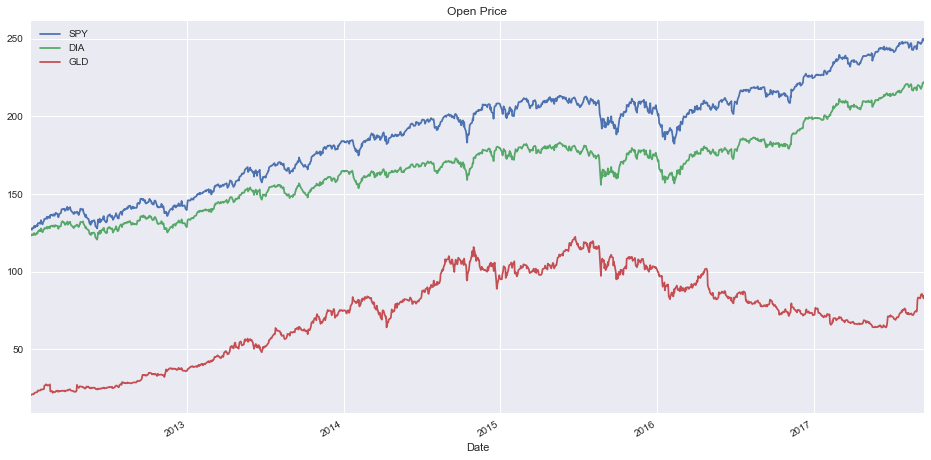

In [13]:
# Plotting the 'Open' price of stock traded each day.
SPY['Open'].plot(label='SPY',figsize=(16,8),title='Open Price')
DIA['Open'].plot(label='DIA',figsize=(16,8),title='Open Price')
GLD['Open'].plot(label='GLD',figsize=(16,8),title='Open Price')
plt.legend() # Adding ; hides the message just like plt.show()
plt.show();

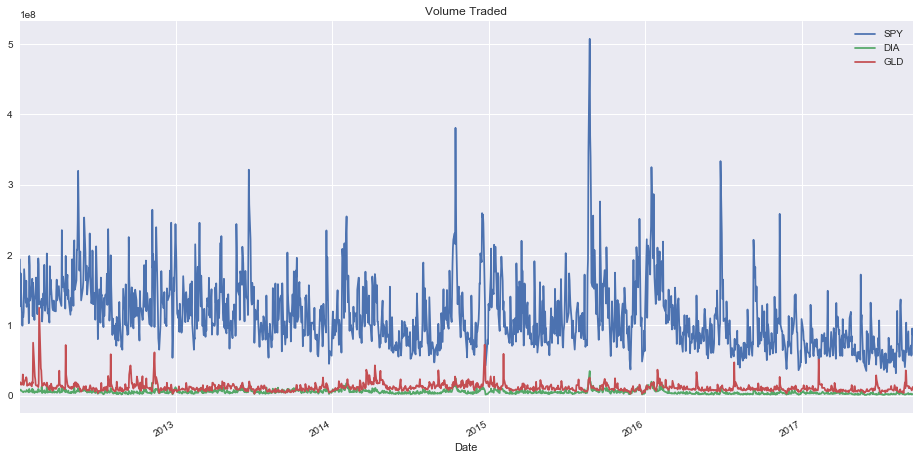

In [14]:
# Plotting the Volume of stock traded each day.
SPY['Volume'].plot(label='SPY',figsize=(16,8),title='Volume Traded')
DIA['Volume'].plot(label='DIA',figsize=(16,8),title='Volume Traded')
GLD['Volume'].plot(label='GLD',figsize=(16,8),title='Volume Traded')
plt.legend(); # Adding ; hides the message just like plt.show()
#plt.show()

In [15]:
# Find the Day on which maximum Volume is Traded
SPY['Volume'].argmax()
#DIA['Volume'].argmax()
#GLD['Volume'].argmax()

Timestamp('2015-08-24 00:00:00')

In [16]:
#Creating a new column for each dataframe called "Total Traded". "Total Traded" = "Open Price" * "Volume Traded".
SPY['Total Traded'] = SPY['Open']*SPY['Volume']
DIA['Total Traded'] = DIA['Open']*DIA['Volume']
GLD['Total Traded'] = GLD['Open']*GLD['Volume']

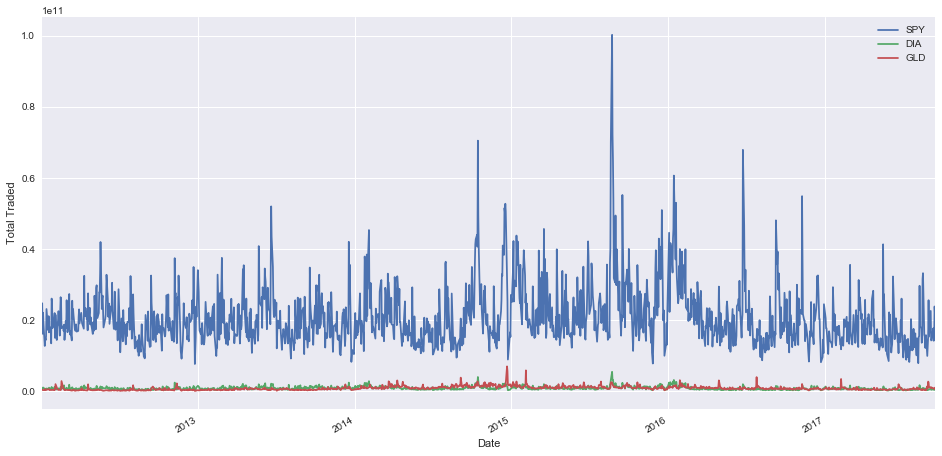

In [17]:
# Plotting the 'Total Traded' against Time Index.
SPY['Total Traded'].plot(label='SPY',figsize=(16,8))
DIA['Total Traded'].plot(label='DIA')
GLD['Total Traded'].plot(label='GLD')
plt.legend()
plt.ylabel('Total Traded');

In [18]:
# Finding the max of 'Total Traded'
SPY['Total Traded'].argmax()

Timestamp('2015-08-24 00:00:00')

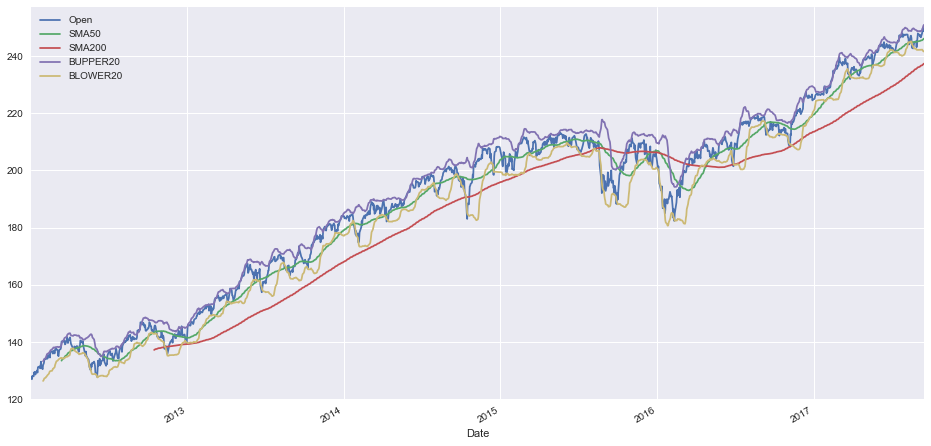

In [19]:
# SMA of the SPY
SPY['SMA20'] = SPY['Open'].rolling(20).mean()
SPY['SMA50'] = SPY['Open'].rolling(50).mean()
SPY['SMA200'] = SPY['Open'].rolling(200).mean()
SPY['BUPPER20'] = SPY['SMA20'] + 2*(SPY['Open'].rolling(20).std()) # Bollinger Band for SMA20 Upper 
SPY['BLOWER20'] = SPY['SMA20'] - 2*(SPY['Open'].rolling(20).std()) # Bollinger Band for SMA20 Lower 
SPY[['Open','SMA50','SMA200','BUPPER20','BLOWER20']].plot(label='SPY',figsize=(16,8));

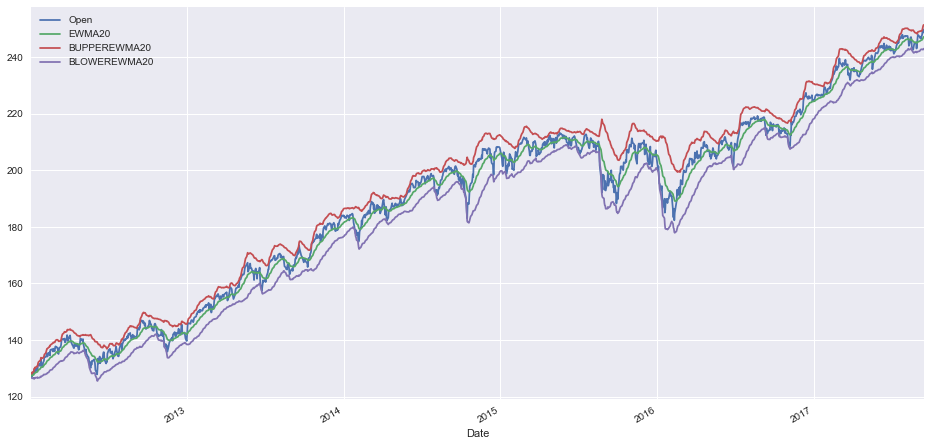

In [20]:
# Exponentially Weighted MA of the SPY
SPY['EWMA20'] = SPY['Open'].ewm(span=20).mean()
SPY['BUPPEREWMA20'] = SPY['EWMA20'] + 2*(SPY['Open'].ewm(span=20).std()) # Bollinger Band for EWMA20 Upper 
SPY['BLOWEREWMA20'] = SPY['EWMA20'] - 2*(SPY['Open'].ewm(span=20).std()) # Bollinger Band for EWMA20 Lower 
SPY[['Open','EWMA20','BUPPEREWMA20','BLOWEREWMA20']].plot(label='SPY',figsize=(16,8));

In [21]:
# Finding Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
decompSPY = seasonal_decompose(SPY['Open'],model='additive',freq= 30)

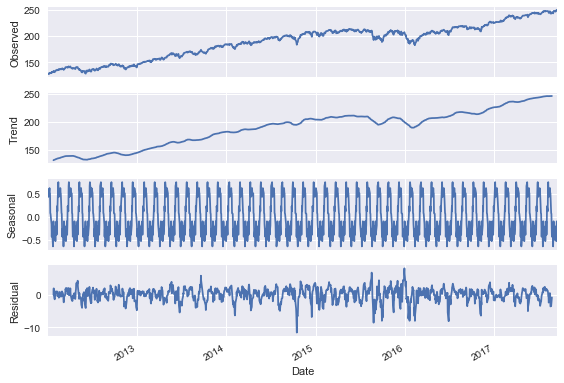

In [23]:
decompSPY.plot();
#decompSPY.seasonal.plot();
#decompSPY.trend.plot();

In [24]:
# Check for Stationary or non-stationary using StatModels
from statsmodels.tsa.stattools import adfuller

In [25]:
stationaritySPY = adfuller(SPY['Open'])
time_series_SPY = SPY['Open']

In [26]:
def adf_check(time_series_SPY):
    
    stationaritySPY = adfuller(time_series_SPY)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Observations used']
    
    for value,label in zip(time_series_SPY,labels):
        print(label+" : "+str(value))
        
    if stationaritySPY[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Failed to Reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [27]:
stationaritySPY

(-0.73448186217254841,
 0.83761467944051127,
 5,
 1430,
 {'1%': -3.4349311729412451,
  '10%': -2.5678471778571081,
  '5%': -2.8635632730206857},
 4914.2734928169502)

In [28]:
adf_check(SPY['Open'])

Augmented Dicky-Fuller Test
ADF Test Statistic : 127.760002
p-value : 127.199997
# of lags : 127.010002
Num of Observations used : 128.199997
Weak evidence against null hypothesis
Failed to Reject null hypothesis
Data has a unit root and is non-stationary


In [29]:
SPY['First Difference'] = SPY['Open'] - SPY['Open'].shift(1)
SPY['Second Difference'] = SPY['First Difference'] - SPY['First Difference'].shift(1)

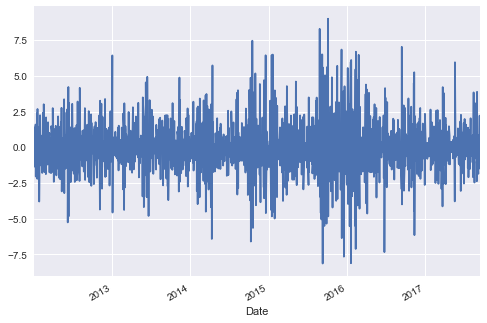

In [30]:
SPY['Second Difference'].plot();

In [31]:
adf_check(SPY['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : 0.37001
p-value : 1.37999
# of lags : -1.389992
Num of Observations used : 1.589996
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [32]:
SPY['Seasonal Difference'] = SPY['Open'] - SPY['Open'].shift(30)

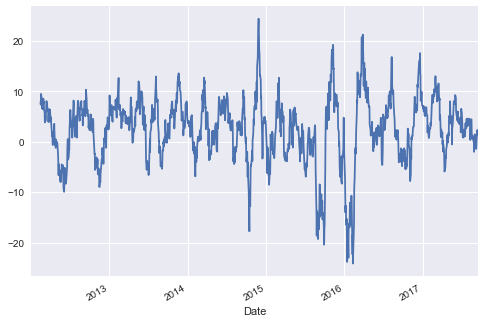

In [33]:
SPY['Seasonal Difference'].plot();

In [34]:
adf_check(SPY['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : 7.870003
p-value : 7.37001
# of lags : 9.510002
Num of Observations used : 8.529999
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [35]:
SPY['Seasonal First Difference'] = SPY['First Difference'] - SPY['First Difference'].shift(30)

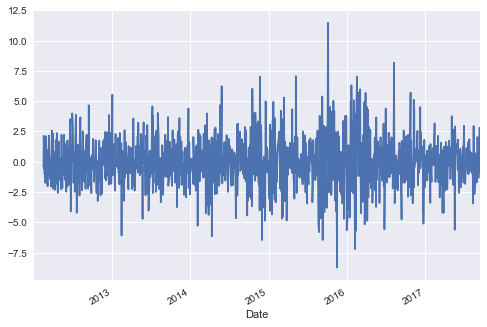

In [36]:
SPY['Seasonal First Difference'].plot();

In [37]:
adf_check(SPY['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -0.499993
p-value : 2.139992
# of lags : -0.980003
Num of Observations used : -0.270004
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [38]:
# Auto Correlation and Partial Auto Correlation Plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

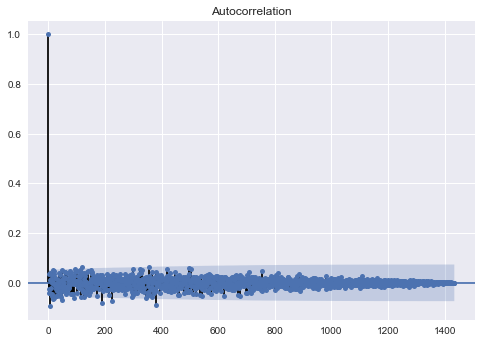

In [39]:
fig_first_SPY = plot_acf(SPY['First Difference'].dropna())

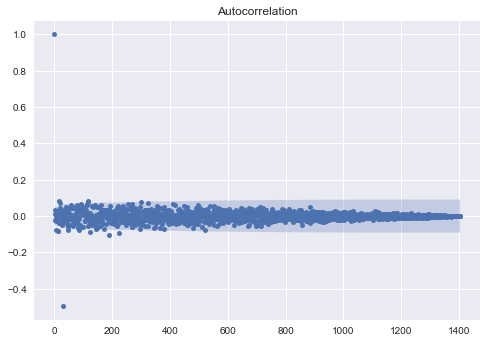

In [40]:
fig_seasonal_first_SPY = plot_acf(SPY['Seasonal First Difference'].dropna(),use_vlines=False)

In [41]:
from pandas.plotting import autocorrelation_plot

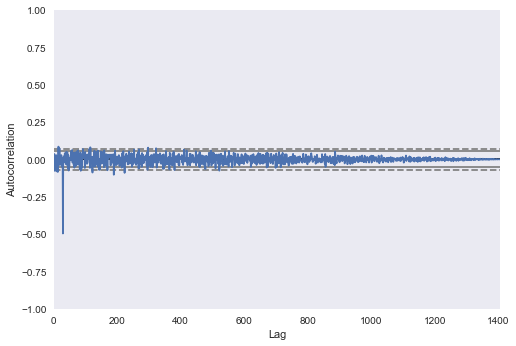

In [42]:
autocorrelation_plot(SPY['Seasonal First Difference'].dropna());

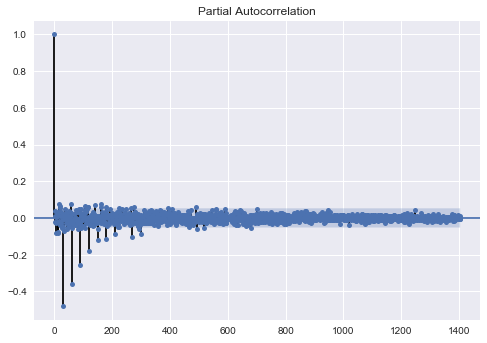

In [43]:
plot_pacf(SPY['Seasonal First Difference'].dropna());

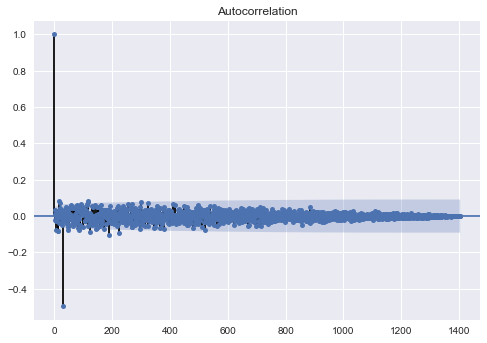

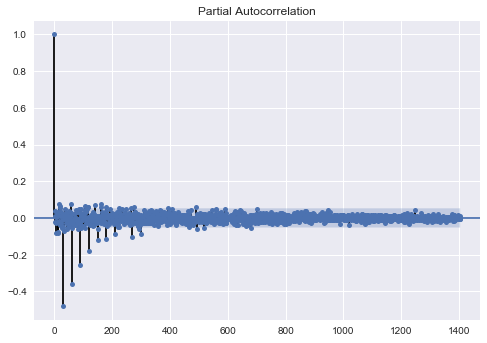

In [44]:
plot_acf(SPY['Seasonal First Difference'].dropna());
plot_pacf(SPY['Seasonal First Difference'].dropna());

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model_SPY = sm.tsa.statespace.SARIMAX(SPY['Open'],order=(0,1,0),seasonal_order=(1,1,1,30))

In [47]:
results_SPY = model_SPY.fit()

In [48]:
print(results_SPY.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Open   No. Observations:                 1436
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 30)   Log Likelihood               -2495.881
Date:                            Sat, 16 Sep 2017   AIC                           4997.763
Time:                                    12:48:14   BIC                           5013.572
Sample:                                01-03-2012   HQIC                          5003.665
                                     - 09-15-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L30      -0.0427      0.025     -1.689      0.091      -0.092       0.007
ma.S.L30      -0.9994      0.895   

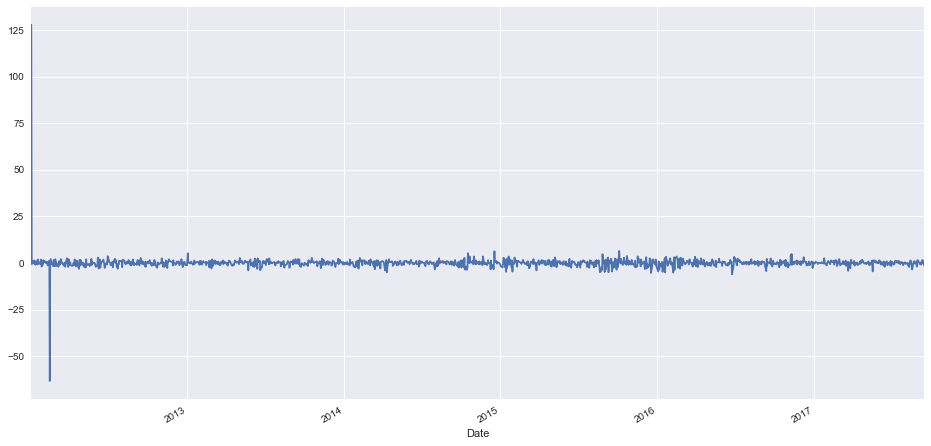

In [49]:
results_SPY.resid.plot(figsize=(16,8));

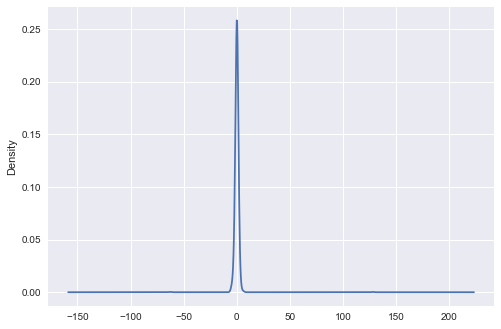

In [50]:
results_SPY.resid.plot(kind='kde',);

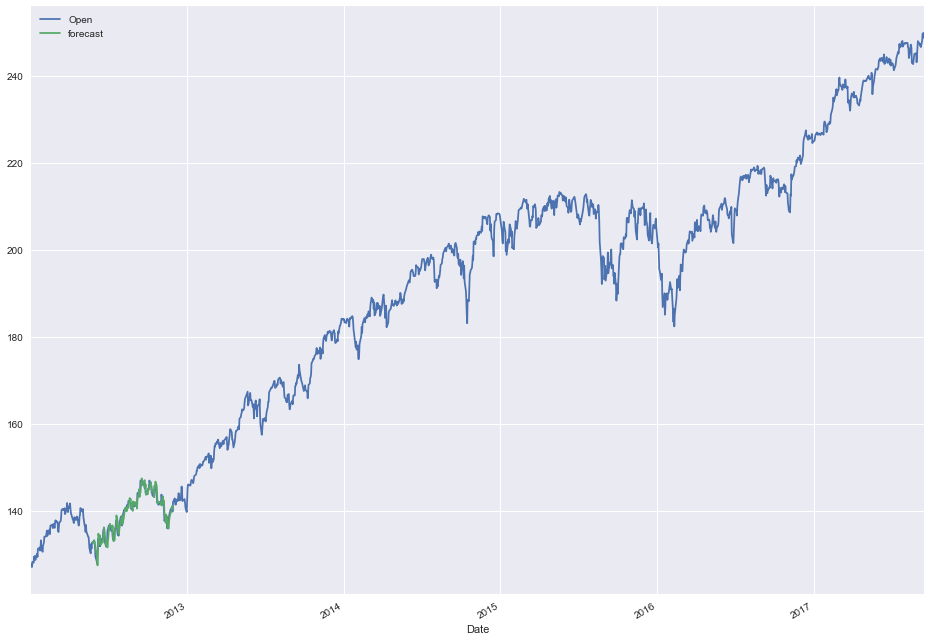

In [51]:
#Forecasting 
SPY['forecast'] = results_SPY.predict(start=100,end=228)
SPY[['Open','forecast']].plot(figsize=(16,12));
#SPY.columns

In [52]:
SPY.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,SMA20,SMA50,SMA200,BUPPER20,BLOWER20,EWMA20,BUPPEREWMA20,BLOWEREWMA20,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Date,,,,,,,,,,,,,,,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,113.410439,193697900,2.474684e+10,NaN,NaN,NaN,NaN,NaN,127.760002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,127.199997,127.809998,126.709999,127.699997,113.588333,127186500,1.617812e+10,NaN,NaN,NaN,NaN,NaN,127.465999,128.257966,126.674033,-0.560005,NaN,NaN,NaN,NaN
2012-01-05,127.010002,128.229996,126.430000,128.039993,113.890732,173895000,2.208640e+10,NaN,NaN,NaN,NaN,NaN,127.298560,128.065886,126.531233,-0.189995,0.370010,NaN,NaN,NaN
2012-01-06,128.199997,128.220001,127.290001,127.709999,113.597221,148050000,1.898001e+10,NaN,NaN,NaN,NaN,NaN,127.558791,128.684062,126.433520,1.189995,1.379990,NaN,NaN,NaN
2012-01-09,128.000000,128.179993,127.410004,128.020004,113.872963,99530200,1.273987e+10,NaN,NaN,NaN,NaN,NaN,127.665516,128.704782,126.626249,-0.199997,-1.389992,NaN,NaN,NaN


In [53]:
from pandas.tseries.offsets import DateOffset

In [54]:
future_dates = [SPY.index[-1] + DateOffset(days = x) for x in range (1,365)]

In [55]:
future_dates

[Timestamp('2017-09-16 00:00:00'),
 Timestamp('2017-09-17 00:00:00'),
 Timestamp('2017-09-18 00:00:00'),
 Timestamp('2017-09-19 00:00:00'),
 Timestamp('2017-09-20 00:00:00'),
 Timestamp('2017-09-21 00:00:00'),
 Timestamp('2017-09-22 00:00:00'),
 Timestamp('2017-09-23 00:00:00'),
 Timestamp('2017-09-24 00:00:00'),
 Timestamp('2017-09-25 00:00:00'),
 Timestamp('2017-09-26 00:00:00'),
 Timestamp('2017-09-27 00:00:00'),
 Timestamp('2017-09-28 00:00:00'),
 Timestamp('2017-09-29 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-10-02 00:00:00'),
 Timestamp('2017-10-03 00:00:00'),
 Timestamp('2017-10-04 00:00:00'),
 Timestamp('2017-10-05 00:00:00'),
 Timestamp('2017-10-06 00:00:00'),
 Timestamp('2017-10-07 00:00:00'),
 Timestamp('2017-10-08 00:00:00'),
 Timestamp('2017-10-09 00:00:00'),
 Timestamp('2017-10-10 00:00:00'),
 Timestamp('2017-10-11 00:00:00'),
 Timestamp('2017-10-12 00:00:00'),
 Timestamp('2017-10-13 00:00:00'),
 Timestamp('2017-10-

In [56]:
future_SPY = pd.DataFrame(index=future_dates,columns=SPY.columns)

In [57]:
future_SPY

,Open,High,Low,Close,Adj Close,Volume,Total Traded,SMA20,SMA50,SMA200,BUPPER20,BLOWER20,EWMA20,BUPPEREWMA20,BLOWEREWMA20,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
2017-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
final_SPY = pd.concat([SPY,future_SPY])

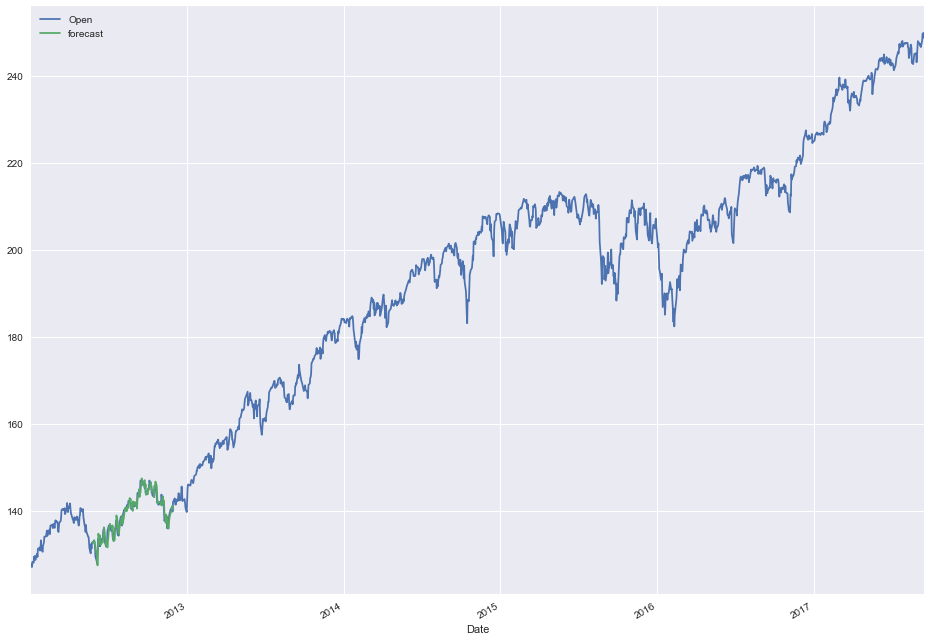

In [59]:
final_SPY['forecast'] = results_SPY.predict(start=980,end=1000)
SPY[['Open','forecast']].plot(figsize=(16,12));

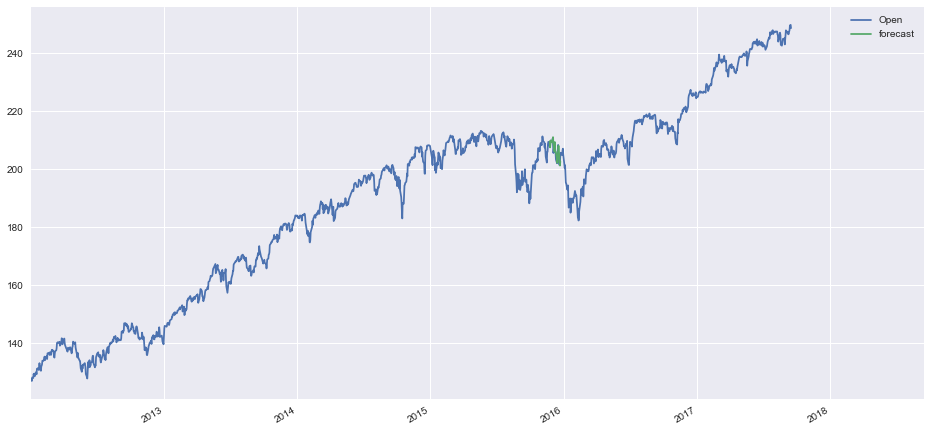

In [60]:
final_SPY[['Open','forecast']].plot(figsize=(16,8));

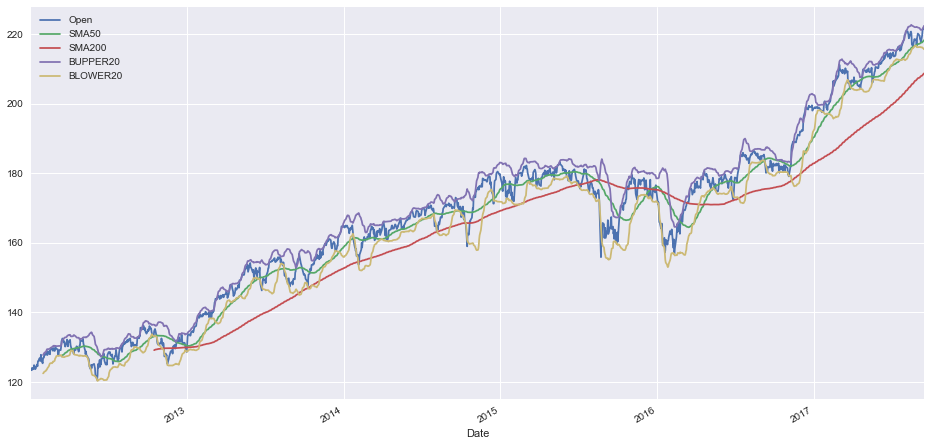

In [61]:
# SMA of the DIA
DIA['SMA20'] = DIA['Open'].rolling(20).mean()
DIA['SMA50'] = DIA['Open'].rolling(50).mean()
DIA['SMA200'] = DIA['Open'].rolling(200).mean()
DIA['BUPPER20'] = DIA['SMA20'] + 2*(DIA['Open'].rolling(20).std()) # Bollinger Band for SMA20 Upper 
DIA['BLOWER20'] = DIA['SMA20'] - 2*(DIA['Open'].rolling(20).std()) # Bollinger Band for SMA20 Lower 
DIA[['Open','SMA50','SMA200','BUPPER20','BLOWER20']].plot(label='DIA',figsize=(16,8));

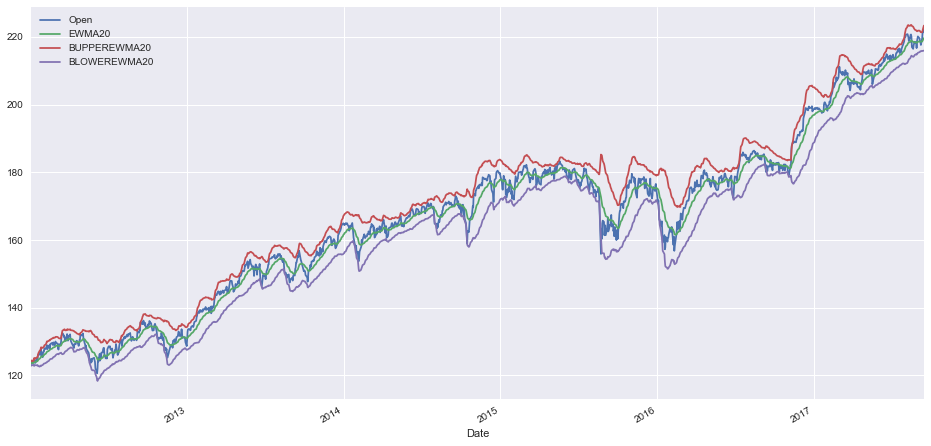

In [62]:
# Exponentially Weighted MA of the DIA
DIA['EWMA20'] = DIA['Open'].ewm(span=20).mean()
DIA['BUPPEREWMA20'] = DIA['EWMA20'] + 2*(DIA['Open'].ewm(span=20).std()) # Bollinger Band for EWMA20 Upper 
DIA['BLOWEREWMA20'] = DIA['EWMA20'] - 2*(DIA['Open'].ewm(span=20).std()) # Bollinger Band for EWMA20 Lower 
DIA[['Open','EWMA20','BUPPEREWMA20','BLOWEREWMA20']].plot(label='DIA',figsize=(16,8));

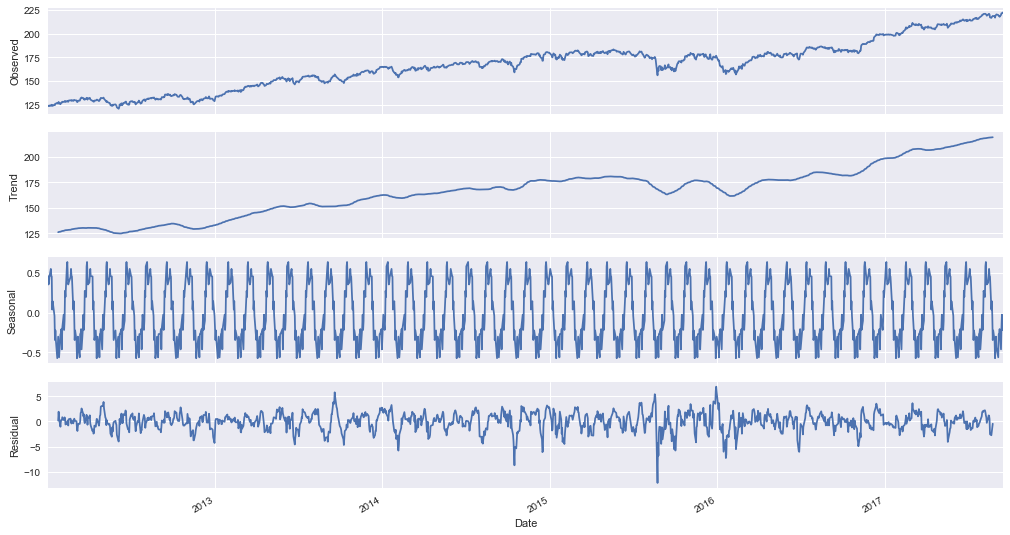

In [63]:
decompDIA = seasonal_decompose(DIA['Open'],model='additive',freq= 30)
decompDIA.plot().set_size_inches(15,8)
plt.show();

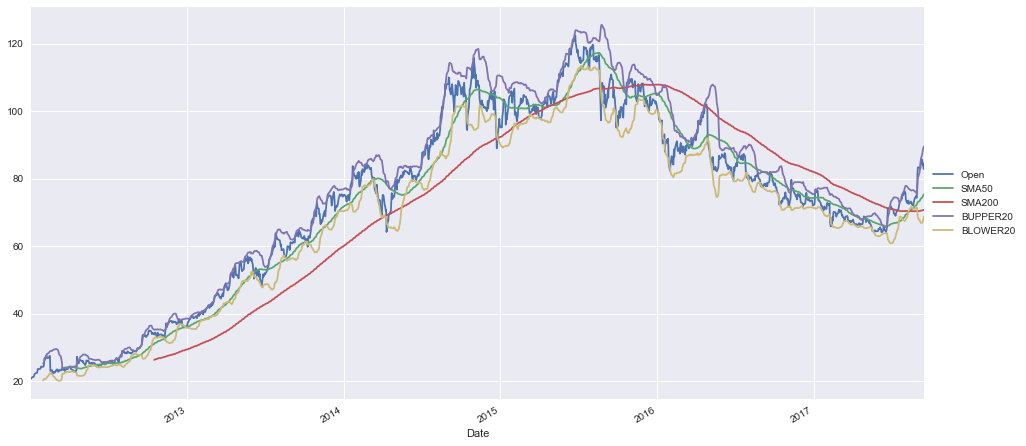

In [64]:
# SMA of the GLD
GLD['SMA20'] = GLD['Open'].rolling(20).mean()
GLD['SMA50'] = GLD['Open'].rolling(50).mean()
GLD['SMA200'] = GLD['Open'].rolling(200).mean()
GLD['BUPPER20'] = GLD['SMA20'] + 2*(GLD['Open'].rolling(20).std()) # Bollinger Band for SMA20 Upper 
GLD['BLOWER20'] = GLD['SMA20'] - 2*(GLD['Open'].rolling(20).std()) # Bollinger Band for SMA20 Lower 
GLD[['Open','SMA50','SMA200','BUPPER20','BLOWER20']].plot(label='GLD',figsize=(16,8));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));# legend OutSide the plot

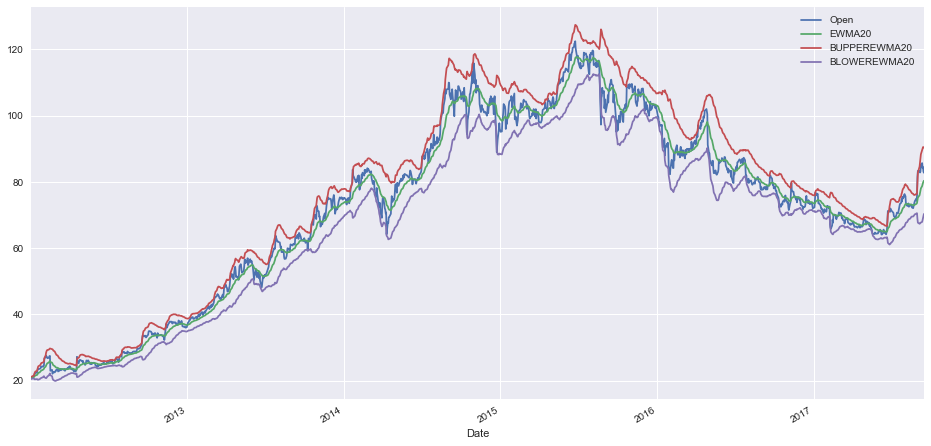

In [65]:
# Exponentially Weighted MA of the GLD
GLD['EWMA20'] = GLD['Open'].ewm(span=20).mean()
GLD['BUPPEREWMA20'] = GLD['EWMA20'] + 2*(GLD['Open'].ewm(span=20).std()) # Bollinger Band for EWMA20 Upper 
GLD['BLOWEREWMA20'] = GLD['EWMA20'] - 2*(GLD['Open'].ewm(span=20).std()) # Bollinger Band for EWMA20 Lower 
GLD[['Open','EWMA20','BUPPEREWMA20','BLOWEREWMA20']].plot(label='GLD',figsize=(16,8));

In [66]:
#Finding the relation between the Stocks
from pandas.plotting import scatter_matrix

In [67]:
stock_comp = pd.concat([SPY['Open'],DIA['Open'],GLD['Open']],axis=1)

In [68]:
stock_comp.columns = ['SPY Open','DIY Open','GLD Open']

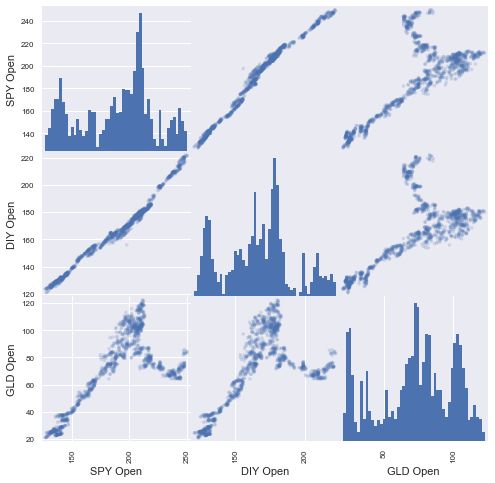

In [69]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(stock_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

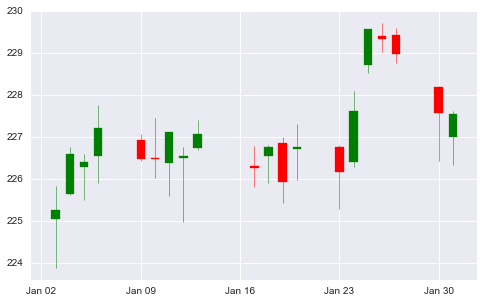

In [70]:
#Create a CandleStick chart for SPY in January 2017
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
SPY_reset = SPY.loc['2017-01':'2017-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
SPY_reset['date_ax'] = SPY_reset['Date'].apply(lambda date: date2num(date))
SPY_values = [tuple(vals) for vals in SPY_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, SPY_values, width=0.6, colorup='g',colordown='r');


In [71]:
# Calculating Daily Percentage Change

# SPY['returns'] = (SPY['Close'] / SPY['Close'].shift(1) ) - 1 # Method 1: Using shift
SPY['returns'] = SPY['Close'].pct_change(1) # Method 2: Using pct_change
DIA['returns'] = DIA['Close'].pct_change(1)
GLD['returns'] = GLD['Close'].pct_change(1)

In [72]:
GLD.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,SMA20,SMA50,SMA200,BUPPER20,BLOWER20,EWMA20,BUPPEREWMA20,BLOWEREWMA20,returns
Date,,,,,,,,,,,,,,,,
2012-01-03,20.730000,20.995001,20.674999,20.930000,19.777407,19564000,4.055617e+08,NaN,NaN,NaN,NaN,NaN,20.730000,NaN,NaN,NaN
2012-01-04,20.975000,21.030001,20.850000,21.010000,19.852999,16236000,3.405501e+08,NaN,NaN,NaN,NaN,NaN,20.858625,21.205107,20.512143,0.003822
2012-01-05,21.020000,21.485001,21.000000,21.260000,20.089230,18431800,3.874364e+08,NaN,NaN,NaN,NaN,NaN,20.917881,21.223580,20.612182,0.011899
2012-01-06,21.190001,21.549999,21.100000,21.389999,20.212070,15542000,3.293350e+08,NaN,NaN,NaN,NaN,NaN,20.996438,21.371368,20.621507,0.006115
2012-01-09,21.245001,21.495001,21.174999,21.365000,20.188450,16801200,3.569415e+08,NaN,NaN,NaN,NaN,NaN,21.056563,21.452700,20.660426,-0.001169


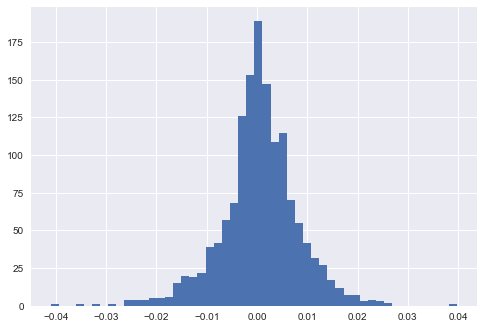

In [73]:
SPY['returns'].hist(bins=50);

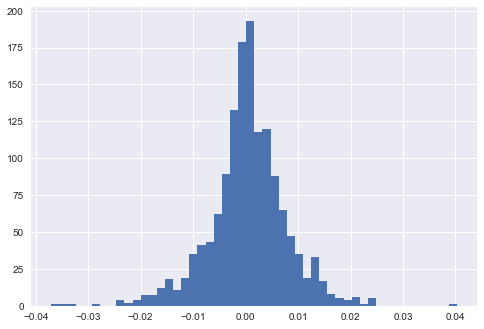

In [74]:
DIA['returns'].hist(bins=50);

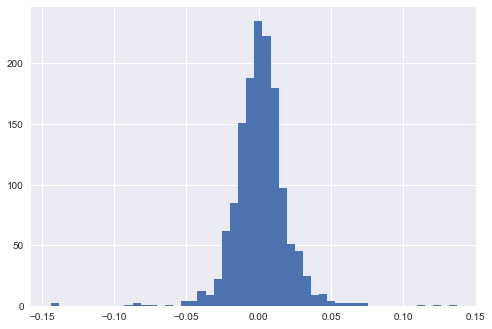

In [75]:
GLD['returns'].hist(bins=50);

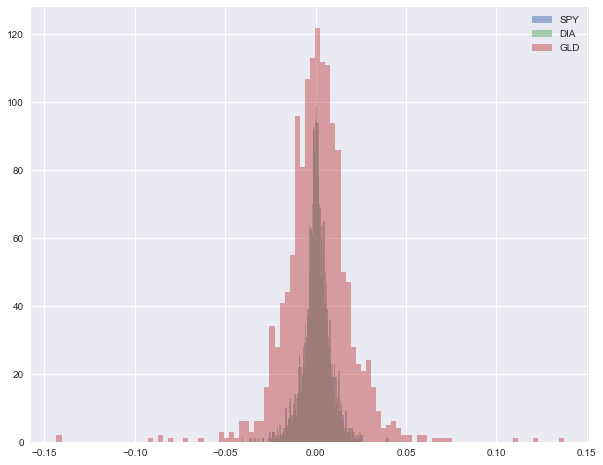

In [76]:
# Comparing the returns by overlapping the plots.
SPY['returns'].hist(bins=100,label='SPY',figsize=(10,8),alpha=0.5)
DIA['returns'].hist(bins=100,label='DIA',alpha=0.5)
GLD['returns'].hist(bins=100,label='GLD',alpha=0.5)
plt.legend();

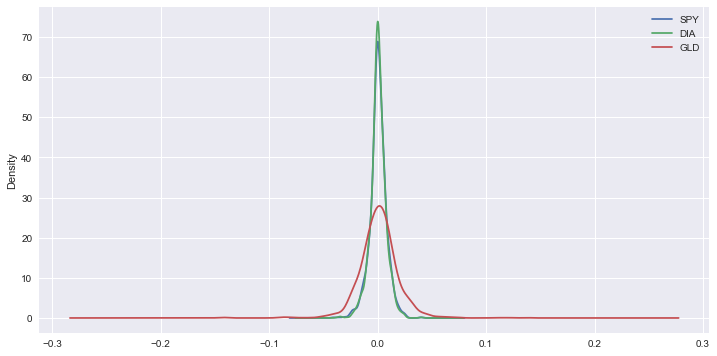

In [77]:
#  plotting a KDE
SPY['returns'].plot(kind='kde',label='SPY',figsize=(12,6))
DIA['returns'].plot(kind='kde',label='DIA')
GLD['returns'].plot(kind='kde',label='GLD')
plt.legend();

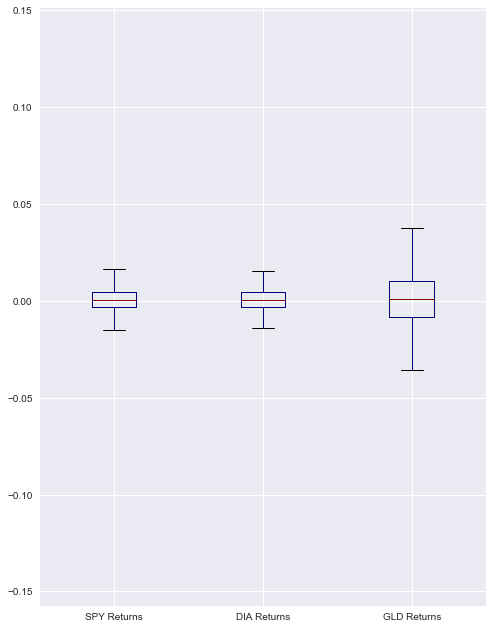

In [78]:
# creating some box plots comparing the returns.
box_df = pd.concat([SPY['returns'],DIA['returns'],GLD['returns']],axis=1)
box_df.columns = ['SPY Returns','DIA Returns','GLD Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet');

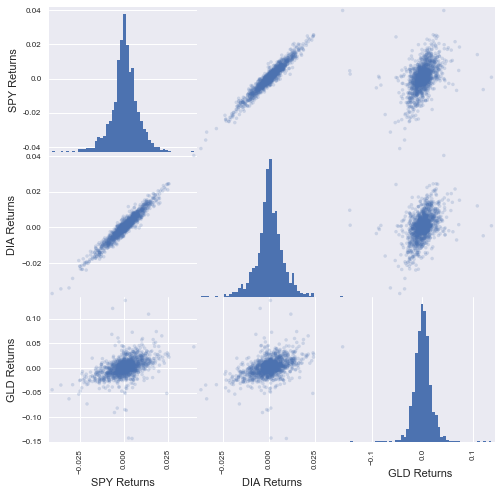

In [79]:
# Comparing Daily Returns between Stocks.
# Creating a scatter matrix plot to see the correlation between each of the stocks daily returns.
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

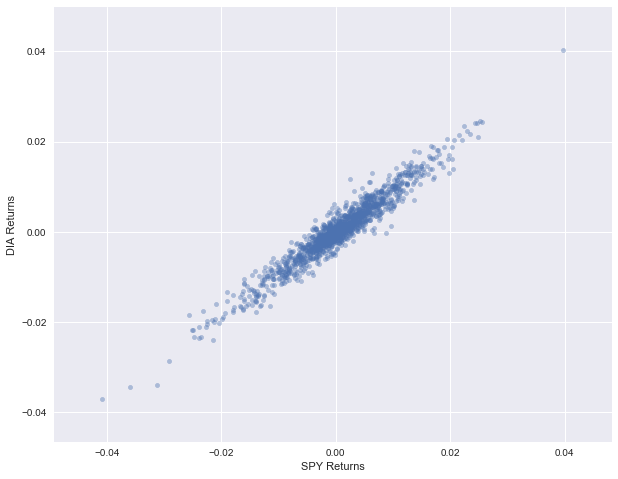

In [80]:
box_df.plot(kind='scatter',x='SPY Returns',y='DIA Returns',alpha=0.4,figsize=(10,8));

In [81]:
"""
Cumulative Daily Return
ii=(1+rt)∗it−1ii=(1+rt)∗it−1
df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
""" 
# Create a cumulative daily return column for each stock
SPY['Cumulative Return'] = (1 + SPY['returns']).cumprod()
DIA['Cumulative Return'] = (1 + DIA['returns']).cumprod()
GLD['Cumulative Return'] = (1 + GLD['returns']).cumprod()

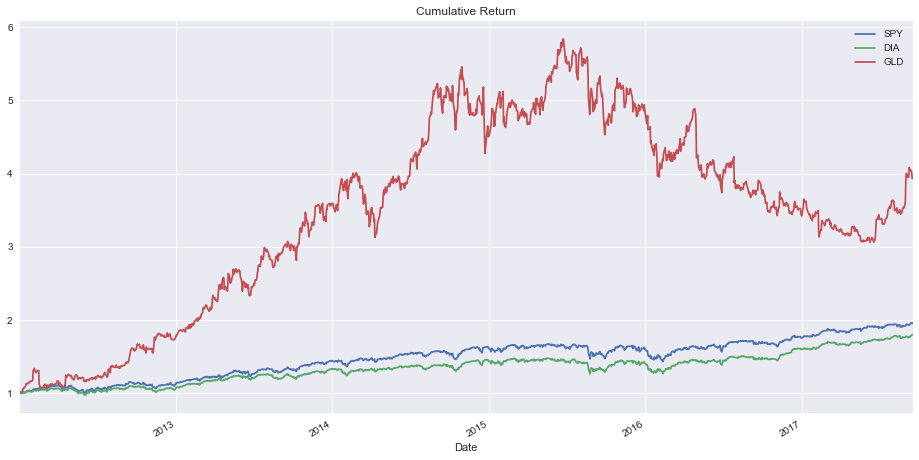

In [82]:
# Plotting the Cumulative Return columns against the time series index
SPY['Cumulative Return'].plot(label='SPY',figsize=(16,8),title='Cumulative Return')
DIA['Cumulative Return'].plot(label='DIA')
GLD['Cumulative Return'].plot(label='GLD')
plt.legend();